## Proyecto 3 - Analítica Computacional para la Toma de Decisiones

#### Juan Pablo Ríos Hernández 201821819
#### Samuel Felipe Ríos Parra 201821820
#### Joep Cornelis Nicolaas van der Kamp 202416832

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Tarea 1. Preguntas de negocio:

#### ¿Cuál va a ser el puntaje que va a obtener un estudiante dada su información académica y sociodemográfica?

#### ¿Cómo es la distribución histórica de los puntajes basados en factores sociodemográficos y académicos?

## Tarea 2. Limpieza y alistamiento de datos:

In [22]:
df = pd.read_csv('Datos_Santander.csv')
df

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20194,TI,SB11201940226736,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,...,Si,Si,Si,A2,61.0,64.0,49.0,59.0,63.0,295.0
1,20194,TI,SB11201940226736,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,...,Si,Si,Si,A2,61.0,64.0,49.0,59.0,63.0,295.0
2,20172,TI,SB11201720104447,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683070e+11,1.683070e+11,68.0,...,No,No,Si,A-,47.0,59.0,64.0,59.0,68.0,307.0
3,20172,TI,SB11201720187961,URBANO,N,A,TÉCNICO/ACADÉMICO,1.685470e+11,1.685470e+11,68.0,...,No,Si,Si,A-,44.0,45.0,45.0,50.0,46.0,232.0
4,20194,CC,SB11201940041980,URBANO,N,A,TÉCNICO,1.682980e+11,1.682980e+11,68.0,...,No,NaN,Si,A-,46.0,52.0,45.0,28.0,53.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105547,20194,TI,SB11201940085543,URBANO,NaN,A,NaN,3.680010e+11,3.680010e+11,68.0,...,Si,Si,No,A1,52.0,46.0,44.0,45.0,44.0,227.0
105548,20172,CC,SB11201720092134,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683680e+11,1.683680e+11,68.0,...,No,No,No,A-,43.0,47.0,52.0,51.0,59.0,258.0
105549,20194,TI,SB11201940034928,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683200e+11,1.683200e+11,68.0,...,Si,Si,Si,A1,50.0,56.0,36.0,40.0,48.0,227.0
105550,20194,TI,SB11201940034928,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683200e+11,1.683200e+11,68.0,...,Si,Si,Si,A1,50.0,56.0,36.0,40.0,48.0,227.0


In [3]:
df.dtypes

PERIODO                            int64
ESTU_TIPODOCUMENTO                object
ESTU_CONSECUTIVO                  object
COLE_AREA_UBICACION               object
COLE_BILINGUE                     object
COLE_CALENDARIO                   object
COLE_CARACTER                     object
COLE_COD_DANE_ESTABLECIMIENTO    float64
COLE_COD_DANE_SEDE               float64
COLE_COD_DEPTO_UBICACION         float64
COLE_COD_MCPIO_UBICACION         float64
COLE_CODIGO_ICFES                float64
COLE_DEPTO_UBICACION              object
COLE_GENERO                       object
COLE_JORNADA                      object
COLE_MCPIO_UBICACION              object
COLE_NATURALEZA                   object
COLE_NOMBRE_ESTABLECIMIENTO       object
COLE_NOMBRE_SEDE                  object
COLE_SEDE_PRINCIPAL               object
ESTU_COD_DEPTO_PRESENTACION      float64
ESTU_COD_MCPIO_PRESENTACION      float64
ESTU_COD_RESIDE_DEPTO            float64
ESTU_COD_RESIDE_MCPIO            float64
ESTU_DEPTO_PRESE

#### Missing Values

In [23]:
df.isna().sum()

PERIODO                              0
ESTU_TIPODOCUMENTO                   0
ESTU_CONSECUTIVO                     0
COLE_AREA_UBICACION                  0
COLE_BILINGUE                    14285
COLE_CALENDARIO                      0
COLE_CARACTER                     1892
COLE_COD_DANE_ESTABLECIMIENTO        0
COLE_COD_DANE_SEDE                   0
COLE_COD_DEPTO_UBICACION             0
COLE_COD_MCPIO_UBICACION             0
COLE_CODIGO_ICFES                    0
COLE_DEPTO_UBICACION                 0
COLE_GENERO                          0
COLE_JORNADA                         0
COLE_MCPIO_UBICACION                 0
COLE_NATURALEZA                      0
COLE_NOMBRE_ESTABLECIMIENTO          0
COLE_NOMBRE_SEDE                     0
COLE_SEDE_PRINCIPAL                  0
ESTU_COD_DEPTO_PRESENTACION          0
ESTU_COD_MCPIO_PRESENTACION          0
ESTU_COD_RESIDE_DEPTO               50
ESTU_COD_RESIDE_MCPIO               50
ESTU_DEPTO_PRESENTACION              0
ESTU_DEPTO_RESIDE        

In [24]:
df.shape

(105552, 51)

In [25]:
value_counts = df['COLE_BILINGUE'].value_counts()
value_counts

COLE_BILINGUE
N    90680
S      587
Name: count, dtype: int64

In [26]:
df_cleaned = df.dropna()
df_cleaned.shape

(86125, 51)

We remove all NaN values


In [8]:
# df['COLE_BILINGUE'].fillna('N', inplace=True)
# df_cleaned2 = df.dropna()
# df_cleaned2.shape


In [27]:
object_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in object_columns:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values of {col}: {unique_values}")

Unique values of ESTU_TIPODOCUMENTO: ['TI' 'CC' 'CR' 'CE' 'NES' 'PEP' 'PE' 'RC']
Unique values of ESTU_CONSECUTIVO: ['SB11201940226736' 'SB11201720104447' 'SB11201720187961' ...
 'SB11201720092134' 'SB11201940034928' 'SB11201620170082']
Unique values of COLE_AREA_UBICACION: ['URBANO' 'RURAL']
Unique values of COLE_BILINGUE: ['N' 'S']
Unique values of COLE_CALENDARIO: ['A' 'OTRO' 'B']
Unique values of COLE_CARACTER: ['TÉCNICO/ACADÉMICO' 'ACADÉMICO' 'TÉCNICO' 'NO APLICA']
Unique values of COLE_DEPTO_UBICACION: ['SANTANDER']
Unique values of COLE_GENERO: ['MIXTO' 'FEMENINO' 'MASCULINO']
Unique values of COLE_JORNADA: ['MAÑANA' 'TARDE' 'COMPLETA' 'SABATINA' 'NOCHE' 'UNICA']
Unique values of COLE_MCPIO_UBICACION: ['BUCARAMANGA' 'GIRON' 'PIEDECUESTA' 'CHARALÁ' 'SIMACOTA' 'FLORIDABLANCA'
 'GUACA' 'CERRITO' 'CURITÍ' 'GIRÓN' 'SANTA HELENA DEL OPON' 'RIONEGRO'
 'LEBRIJA' 'SURATA' 'PUERTO WILCHES' 'GUAVATA' 'CONCEPCION' 'SUAITA'
 'BARRANCABERMEJA' 'SAN VICENTE DE CHUCURÍ' 'SAN GIL' 'MÁLAGA' 'MALA

#### Outliers

In [28]:
# Seperate the numerical and categorical columns and then calculate the IQR for the numerical columns to discover outliers
numerical_columns = df_cleaned.select_dtypes(include=['number'])
categorical_columns = df_cleaned.select_dtypes(exclude=['number'])

# Calculate IQR for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR)))

In [29]:
outliers_count = outliers.sum()

# Print the number of outliers for each numerical column
print("Number of outliers for each numerical column:")
print(outliers_count)

Number of outliers for each numerical column:
PERIODO                             0
COLE_COD_DANE_ESTABLECIMIENTO    1751
COLE_COD_DANE_SEDE               1718
COLE_COD_DEPTO_UBICACION            0
COLE_COD_MCPIO_UBICACION            0
COLE_CODIGO_ICFES                7109
ESTU_COD_DEPTO_PRESENTACION      1432
ESTU_COD_MCPIO_PRESENTACION      1432
ESTU_COD_RESIDE_DEPTO             888
ESTU_COD_RESIDE_MCPIO             888
PUNT_INGLES                       831
PUNT_MATEMATICAS                  355
PUNT_SOCIALES_CIUDADANAS          109
PUNT_C_NATURALES                  236
PUNT_LECTURA_CRITICA              127
PUNT_GLOBAL                       207
dtype: int64


The columns with codigos should not be seen as outliers, therefore the columns with outliers are the puntaje columns. These outliers will be removed as it is such a big dataset. 

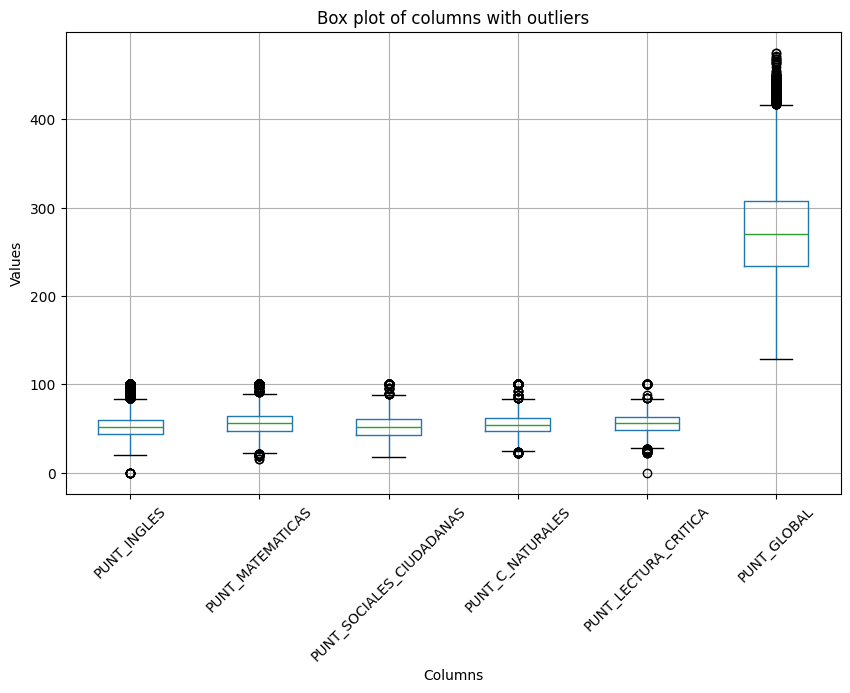

In [30]:
# Specify the columns with outliers
columns_with_outliers = ['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']

# Create box plots for each column
plt.figure(figsize=(10, 6))
df_cleaned[columns_with_outliers].boxplot()
plt.title('Box plot of columns with outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Remove outliers from specified columns
df_cleaned_no_outliers = df_cleaned[~outliers[columns_with_outliers].any(axis=1)]

# Print the shape of the dataframe after removing outliers
print("Shape of dataframe after removing outliers:", df_cleaned_no_outliers.shape)

Shape of dataframe after removing outliers: (84787, 51)


#### Handling categorical data

Machine learning modules cannot understand non-numeric data. Therefore we handle the categorical data by one-hot encoding the categories that do not have an ordinal relationship and label encoding the categories that do have an ordinal relationship.

One-hot variables:
- ESTU_TIPODOCUMENTO
- COLE_AREA_UBICACION
- COLE_BILINGUE
- COLE_CALENDARIO
- COLE_CARACTER
- COLE_GENERO
- COLE_JORNADA
- COLE_SEDE_PRINCIPAL
- ESTU_DEPTO_PRESENTACION
- ESTU_DEPTO_RESIDE
- ESTU_ESTADOINVESTIGACION
- ESTU_GENERO
- ESTU_NACIONALIDAD
- ESTU_PAIS_RESIDE
- FAMI_TIENEAUTOMOVIL
- FAMI_TIENECOMPUTADOR
- FAMI_TIENEINTERNET
- FAMI_TIENELAVADORA
- FAMI_PERSONASHOGAR ~~
- FAMI_CUARTOSHOGAR ~~
- FAMI_EDUCACIONMADRE ~~
- FAMI_EDUCACIONPADRE  ~~

Label encoding variables:
- ESTU_FECHANACIMIENTO
- FAMI_ESTRATOVIVIENDA
- DESEMP_INGLES

Others:
- COLE_MCPIO_UBICACION
- ESTU_MCPIO_PRESENTACION
- ESTU_MCPIO_RESIDE

Remove:
- ESTU_CONSECUTIVO
- COLE_DEPTO_UBICACION
- ESTU_ESTUDIANTE
- ESTU_PRIVADO_LIBERTAD

We remove these three variables as they all only have 1 value and will not contribute to the model. ESTU_CONSECUTIVO is removed as it is a code.

In [32]:
df_cleaned_no_outliers.drop(['ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION', 'ESTU_ESTUDIANTE', 'ESTU_PRIVADO_LIBERTAD'], axis=1, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\3900521874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers.drop(['ESTU_CONSECUTIVO', 'COLE_DEPTO_UBICACION', 'ESTU_ESTUDIANTE', 'ESTU_PRIVADO_LIBERTAD'], axis=1, inplace=True)


One-hot encoding

In [33]:
# # List of categorical variables to one-hot encode
# categorical_columns = ['ESTU_TIPODOCUMENTO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
#                        'COLE_CARACTER', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_SEDE_PRINCIPAL',
#                        'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE', 'ESTU_ESTADOINVESTIGACION',
#                        'ESTU_GENERO', 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE', 'FAMI_TIENEAUTOMOVIL',
#                        'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA']

# # One-hot encode the categorical variables
# df_cleaned_no_outliers_encoded = pd.get_dummies(df_cleaned_no_outliers, columns=categorical_columns, drop_first=True)

In [16]:
# df_cleaned_no_outliers_encoded.shape

In [17]:
# df_cleaned_no_outliers_encoded.dtypes

In [34]:
df_cleaned_no_outliers

,PERIODO,ESTU_TIPODOCUMENTO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,68001.0,...,Si,Si,Si,A2,61.0,64.0,49.0,59.0,63.0,295.0
1,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,68001.0,...,Si,Si,Si,A2,61.0,64.0,49.0,59.0,63.0,295.0
2,20172,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683070e+11,1.683070e+11,68.0,68307.0,...,No,No,Si,A-,47.0,59.0,64.0,59.0,68.0,307.0
3,20172,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.685470e+11,1.685470e+11,68.0,68547.0,...,No,Si,Si,A-,44.0,45.0,45.0,50.0,46.0,232.0
6,20172,TI,URBANO,N,A,ACADÉMICO,3.680010e+11,3.680010e+11,68.0,68001.0,...,Si,Si,Si,A2,63.0,79.0,69.0,68.0,68.0,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105545,20162,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.686890e+11,1.686890e+11,68.0,68689.0,...,No,Si,Si,A-,46.0,47.0,43.0,50.0,41.0,227.0
105548,20172,CC,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683680e+11,1.683680e+11,68.0,68368.0,...,No,No,No,A-,43.0,47.0,52.0,51.0,59.0,258.0
105549,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683200e+11,1.683200e+11,68.0,68320.0,...,Si,Si,Si,A1,50.0,56.0,36.0,40.0,48.0,227.0
105550,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683200e+11,1.683200e+11,68.0,68320.0,...,Si,Si,Si,A1,50.0,56.0,36.0,40.0,48.0,227.0


In [19]:
# List of variables
variables = ['ESTU_FECHANACIMIENTO', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE',
             'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'DESEMP_INGLES']

# Extract unique values for each variable
unique_values = {}
for variable in variables:
    unique_values[variable] = df_cleaned_no_outliers[variable].unique()

# Print unique values for each variable
for variable, values in unique_values.items():
    print(f"Unique values for {variable}:")
    print(values)
    print()

Unique values for ESTU_FECHANACIMIENTO:
['02/12/2002' '18/11/2000' '05/03/2000' ... '27/03/1990' '03/10/1984'
 '26/05/1979']

Unique values for FAMI_CUARTOSHOGAR:
['Tres' 'Cuatro' 'Dos' 'Uno' 'Seis o mas' 'Cinco' 'Seis' 'Siete' 'Ocho'
 'Diez o más' 'Nueve']

Unique values for FAMI_EDUCACIONMADRE:
['Educación profesional incompleta' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional completa' 'Primaria incompleta'
 'Secundaria (Bachillerato) completa' 'Técnica o tecnológica completa'
 'Primaria completa' 'Técnica o tecnológica incompleta' 'Postgrado'
 'Ninguno' 'No sabe' 'No Aplica']

Unique values for FAMI_EDUCACIONPADRE:
['Secundaria (Bachillerato) completa' 'Primaria incompleta'
 'Educación profesional incompleta' 'Técnica o tecnológica incompleta'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'No sabe' 'Educación profesional completa' 'Primaria completa' 'Ninguno'
 'Postgrado' 'No Aplica']

Unique values for FAMI_ESTRATOVIVIENDA:
['Estrato 3' 

Label encoding

The variables with ordinal ranks are label encoded

In [35]:
from datetime import datetime

# Function to convert date string to numerical value
def convert_to_numerical(date_string):
    date_object = datetime.strptime(date_string, '%d/%m/%Y')
    day = date_object.day
    month = date_object.month
    year = date_object.year
    return day, month, year

# Apply the conversion function to the entire column
df_cleaned_no_outliers[['Day', 'Month', 'Year']] = df_cleaned_no_outliers['ESTU_FECHANACIMIENTO'].apply(lambda x: pd.Series(convert_to_numerical(x)))
df_cleaned_no_outliers.drop(columns=['ESTU_FECHANACIMIENTO'], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\49311363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers[['Day', 'Month', 'Year']] = df_cleaned_no_outliers['ESTU_FECHANACIMIENTO'].apply(lambda x: pd.Series(convert_to_numerical(x)))
C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\49311363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers[['Day', 'Month', 'Year']] = df_cleaned_no_outliers['ESTU_FECHANACIMIENTO'].apply(lambda x: pd.Series(convert_to_numer

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define mapping for label encoding
estrato_mapping = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Apply label encoding using the defined mapping
df_cleaned_no_outliers['FAMI_ESTRATOVIVIENDA_ENCODED'] = df_cleaned_no_outliers['FAMI_ESTRATOVIVIENDA'].map(estrato_mapping)
df_cleaned_no_outliers.drop(columns=['FAMI_ESTRATOVIVIENDA'], inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\2819847291.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers['FAMI_ESTRATOVIVIENDA_ENCODED'] = df_cleaned_no_outliers['FAMI_ESTRATOVIVIENDA'].map(estrato_mapping)
C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\2819847291.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers.drop(columns=['FAMI_ESTRATOVIVIENDA'], inplace=True)


In [37]:
# Define the custom mapping dictionary
mapping_dict = {'A-': 1, 'A1': 2, 'A2': 3, 'B1': 4, 'B+': 5}

# Replace the values using the mapping dictionary
df_cleaned_no_outliers['DESEMP_INGLES'] = df_cleaned_no_outliers['DESEMP_INGLES'].map(mapping_dict)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\515899654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers['DESEMP_INGLES'] = df_cleaned_no_outliers['DESEMP_INGLES'].map(mapping_dict)


In [38]:
df_cleaned_no_outliers.head()

,PERIODO,ESTU_TIPODOCUMENTO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,...,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Day,Month,Year,FAMI_ESTRATOVIVIENDA_ENCODED
0,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,68001.0,...,61.0,64.0,49.0,59.0,63.0,295.0,2,12,2002,3
1,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,68001.0,...,61.0,64.0,49.0,59.0,63.0,295.0,2,12,2002,3
2,20172,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683070e+11,1.683070e+11,68.0,68307.0,...,47.0,59.0,64.0,59.0,68.0,307.0,18,11,2000,1
3,20172,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.685470e+11,1.685470e+11,68.0,68547.0,...,44.0,45.0,45.0,50.0,46.0,232.0,5,3,2000,2
6,20172,TI,URBANO,N,A,ACADÉMICO,3.680010e+11,3.680010e+11,68.0,68001.0,...,63.0,79.0,69.0,68.0,68.0,352.0,29,6,2000,4


#### Scaling

In [39]:
df_visualizations = df_cleaned_no_outliers.copy()

In [40]:
df_visualizations.head()

,PERIODO,ESTU_TIPODOCUMENTO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,...,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Day,Month,Year,FAMI_ESTRATOVIVIENDA_ENCODED
0,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,68001.0,...,61.0,64.0,49.0,59.0,63.0,295.0,2,12,2002,3
1,20194,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,68001.0,...,61.0,64.0,49.0,59.0,63.0,295.0,2,12,2002,3
2,20172,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.683070e+11,1.683070e+11,68.0,68307.0,...,47.0,59.0,64.0,59.0,68.0,307.0,18,11,2000,1
3,20172,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,1.685470e+11,1.685470e+11,68.0,68547.0,...,44.0,45.0,45.0,50.0,46.0,232.0,5,3,2000,2
6,20172,TI,URBANO,N,A,ACADÉMICO,3.680010e+11,3.680010e+11,68.0,68001.0,...,63.0,79.0,69.0,68.0,68.0,352.0,29,6,2000,4


In [41]:
df_cleaned_no_outliers.dtypes

PERIODO                            int64
ESTU_TIPODOCUMENTO                object
COLE_AREA_UBICACION               object
COLE_BILINGUE                     object
COLE_CALENDARIO                   object
COLE_CARACTER                     object
COLE_COD_DANE_ESTABLECIMIENTO    float64
COLE_COD_DANE_SEDE               float64
COLE_COD_DEPTO_UBICACION         float64
COLE_COD_MCPIO_UBICACION         float64
COLE_CODIGO_ICFES                float64
COLE_GENERO                       object
COLE_JORNADA                      object
COLE_MCPIO_UBICACION              object
COLE_NATURALEZA                   object
COLE_NOMBRE_ESTABLECIMIENTO       object
COLE_NOMBRE_SEDE                  object
COLE_SEDE_PRINCIPAL               object
ESTU_COD_DEPTO_PRESENTACION      float64
ESTU_COD_MCPIO_PRESENTACION      float64
ESTU_COD_RESIDE_DEPTO            float64
ESTU_COD_RESIDE_MCPIO            float64
ESTU_DEPTO_PRESENTACION           object
ESTU_DEPTO_RESIDE                 object
ESTU_ESTADOINVES

In [42]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df_cleaned_no_outliers.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

# Fit and transform the numerical data
df_cleaned_no_outliers[numerical_columns] = scaler.fit_transform(df_cleaned_no_outliers[numerical_columns])


C:\Users\Acer\AppData\Local\Temp\ipykernel_18240\347738380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers[numerical_columns] = scaler.fit_transform(df_cleaned_no_outliers[numerical_columns])


In [43]:
df_cleaned_no_outliers.head()

,PERIODO,ESTU_TIPODOCUMENTO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,...,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,Day,Month,Year,FAMI_ESTRATOVIVIENDA_ENCODED
0,1.017128,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,-0.653463,-0.656716,0.0,-1.088771,...,0.744954,0.766767,-0.219127,0.49489,0.753816,0.522389,-1.554341,1.577763,0.256428,0.865125
1,1.017128,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,-0.653463,-0.656716,0.0,-1.088771,...,0.744954,0.766767,-0.219127,0.49489,0.753816,0.522389,-1.554341,1.577763,0.256428,0.865125
2,-0.547372,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,-0.649977,-0.653228,0.0,0.104549,...,-0.441611,0.337615,1.067820,0.49489,1.258172,0.767275,0.263361,1.287351,0.000067,-0.995192
3,-0.547372,TI,URBANO,N,A,TÉCNICO/ACADÉMICO,-0.647242,-0.650492,0.0,1.040487,...,-0.695875,-0.864010,-0.562313,-0.38358,-0.960994,-0.763265,-1.213522,-1.035942,0.000067,-0.065033
6,-0.547372,TI,URBANO,N,A,ACADÉMICO,1.625250,1.623262,0.0,-1.088771,...,0.914463,2.054221,1.496802,1.37336,1.258172,1.685600,1.513031,-0.164707,0.000067,1.795284


## Tarea 4. Modelamiento:

In [44]:
columns_to_keep = [
    "COLE_BILINGUE", "COLE_CALENDARIO", "COLE_GENERO", "COLE_JORNADA", 
    "ESTU_GENERO", "FAMI_ESTRATOVIVIENDA_ENCODED", "COLE_AREA_UBICACION", 
    "DESEMP_INGLES", "Year", "PUNT_GLOBAL"
]

df = df_cleaned_no_outliers[columns_to_keep]

One-hot encoding

In [45]:
categorical_columns = [
    'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_GENERO', 'COLE_JORNADA', 'ESTU_GENERO', 'COLE_AREA_UBICACION'
]

df_final = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
encoded_columns = df_final.columns.difference(df.columns).tolist()
df_final[encoded_columns] = df_final[encoded_columns].astype(int)

In [46]:
df_final.shape

(84787, 16)

In [47]:
df_final.head()

,FAMI_ESTRATOVIVIENDA_ENCODED,DESEMP_INGLES,Year,PUNT_GLOBAL,COLE_BILINGUE_S,COLE_CALENDARIO_B,COLE_CALENDARIO_OTRO,COLE_GENERO_MASCULINO,COLE_GENERO_MIXTO,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,ESTU_GENERO_M,COLE_AREA_UBICACION_URBANO
0,0.865125,0.889857,0.256428,0.522389,0,0,0,0,1,1,0,0,0,0,0,1
1,0.865125,0.889857,0.256428,0.522389,0,0,0,0,1,1,0,0,0,0,0,1
2,-0.995192,-1.000178,0.000067,0.767275,0,0,0,0,1,0,0,0,1,0,0,1
3,-0.065033,-1.000178,0.000067,-0.763265,0,0,0,0,1,1,0,0,0,0,0,1
6,1.795284,0.889857,0.000067,1.685600,0,0,0,0,1,0,0,0,1,0,1,1


In [48]:
numerical_columns = ["FAMI_ESTRATOVIVIENDA_ENCODED", "DESEMP_INGLES", "Year", "PUNT_GLOBAL"]

df_numerical = df_final[numerical_columns]

correlation_matrix = df_numerical.corr()

correlation_matrix

,FAMI_ESTRATOVIVIENDA_ENCODED,DESEMP_INGLES,Year,PUNT_GLOBAL
FAMI_ESTRATOVIVIENDA_ENCODED,1.000000,0.383363,0.043441,0.290634
DESEMP_INGLES,0.383363,1.000000,0.069134,0.749526
Year,0.043441,0.069134,1.000000,0.093810
PUNT_GLOBAL,0.290634,0.749526,0.093810,1.000000


In [49]:
from sklearn.model_selection import train_test_split

y = df_final['PUNT_GLOBAL'].values
X = df_final.drop(columns=['PUNT_GLOBAL']).values

X_train_full, X_test, y_train_full, y_test = train_test_split(
   X , y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

In [50]:
print('Dimensiones entrenamiento: ', X_train.shape)
print('Dimensiones prueba: ', X_test.shape)
print('Dimensiones validación: ', X_valid.shape)

Dimensiones entrenamiento:  (54263, 15)
Dimensiones prueba:  (16958, 15)
Dimensiones validación:  (13566, 15)


#### Hiperparámetros

In [ ]:
import mlflow
import mlflow.tensorflow
import tensorflow as tf

# Define hyperparameters
# no_neuronas1 = [2, 5, 8, 10]
# no_neuronas2 = [2, 5, 8, 10]
# activation_func1 = ["relu", "softmax", "tanh", "sigmoid"]
# activation_func2 = ["relu", "softmax", "tanh", "sigmoid"]
# activation_funcFinal = ["linear"]  # Use 'linear' activation for regression
# loss_func = ["mean_squared_error", "mean_absolute_error", 'Huber']
# opt_type = ['nadam', 'sgd', 'Adam', 'RMSprop', 'Adagrad']

no_neuronas1 = [5, 8, 10]
activation_func1 = ["relu", "tanh"]
activation_funcFinal = ["linear"]  # Use 'linear' activation for regression
loss_func = ["mean_squared_error"]
opt_type = ['sgd', 'Adam', 'RMSprop']

# Create DataFrames to store configurations and results
escenarios = pd.DataFrame(index=[
    "No_capas", "No_neuronas_capa1", "No_neuronas_capa2", "No_neuronas_capa3", 
    "F_act_capa1", "F_act_capa2", "F_act_capa3", "F_act_capafinal", "F_perdida", "optimizador"
])
result_loss = pd.DataFrame(index=range(10))        

# Set up MLflow
mlflow.set_tracking_uri('http://localhost:5000')
experiment = mlflow.set_experiment("tensorflow-NN")

cont_caso = 1 # Case counter
for neu_1 in no_neuronas1:
    for act_1 in activation_func1:
        for act_final in activation_funcFinal:
            for per in loss_func:
                for o in opt_type:
                    with mlflow.start_run(experiment_id=experiment.experiment_id):
                        # Set random seed and clear session
                        tf.random.set_seed(42)
                        tf.keras.backend.clear_session()

                        # Build the model
                        model = tf.keras.Sequential()
                        model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
                        model.add(tf.keras.layers.Dense(neu_1, activation=act_1))
                        # Uncomment and add additional layers as needed
                        # model.add(tf.keras.layers.Dense(neu_2, activation=act_2))
                        # model.add(tf.keras.layers.Dense(neu_3, activation=act_3))
                        model.add(tf.keras.layers.Dense(1, activation=act_final))  # Single neuron for regression output

                        # Compile the model
                        model.compile(loss=per, optimizer=o, metrics=["mean_squared_error"])

                        # Train the model
                        history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

                        # Log parameters
                        mlflow.log_param("No_neuronas_capa1", neu_1)
                        mlflow.log_param("F_act_capa1", act_1)
                        mlflow.log_param("F_act_capafinal", act_final)
                        mlflow.log_param("F_perdida", per)
                        mlflow.log_param("optimizador", o)

                        # Log model
                        mlflow.tensorflow.log_model(model, "tensorflow-model")

                        # Log metrics from validation
                        val_mse = history.history['val_mean_squared_error'][-1]
                        mlflow.log_metric("val_mean_squared_error", val_mse)

                        # Evaluate the model on the test data and log the test metric
                        test_mse = model.evaluate(X_test, y_test, verbose=0)[1]
                        mlflow.log_metric("test_mean_squared_error", test_mse)

                        # Record the configuration and results
                        escenarios.loc['No_capas', str(cont_caso)] = 1  # Only one hidden layer in this example
                        escenarios.loc["No_neuronas_capa1", str(cont_caso)] = neu_1
                        # escenarios.loc["No_neuronas_capa2", str(cont_caso)] = neu_2
                        # escenarios.loc["No_neuronas_capa3", str(cont_caso)] = neu_3
                        escenarios.loc["F_act_capa1", str(cont_caso)] = act_1
                        # escenarios.loc["F_act_capa2", str(cont_caso)] = act_2
                        # escenarios.loc["F_act_capa3", str(cont_caso)] = act_3
                        escenarios.loc["F_act_capafinal", str(cont_caso)] = act_final
                        escenarios.loc["F_perdida", str(cont_caso)] = per
                        escenarios.loc["optimizador", str(cont_caso)] = o
                        result_loss[str(cont_caso)] = history.history['val_mean_squared_error']

                        # Increment case counter
                        cont_caso += 1



Epoch 1/10


1696/1696 [==============================] - 11s 5ms/step - loss: 0.6845 - mean_squared_error: 0.6845 - val_loss: 0.4447 - val_mean_squared_error: 0.4447
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4258 - mean_squared_error: 0.4258 - val_loss: 0.4212 - val_mean_squared_error: 0.4212
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4107 - mean_squared_error: 0.4107 - val_loss: 0.4103 - val_mean_squared_error: 0.4103
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4056 - mean_squared_error: 0.4056 - val_loss: 0.4069 - val_mean_squared_error: 0.4069
Epoch 5/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4033 - mean_squared_error: 0.4033 - val_loss: 0.4051 - val_mean_squared_error: 0.4051
Epoch 6/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4021 - mean_squared_error: 0.4021 - val_loss: 0.4056 - val_mean_squared_error: 0.4056
Epoch 7/10


2024/05/27 09:31:01 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpnk9gdecw\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpnk9gdecw\model\data\model\assets
c:\Users\20192818\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning:

Setuptools is replacing distutils.

C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 10s 5ms/step - loss: 0.5096 - mean_squared_error: 0.5096 - val_loss: 0.4204 - val_mean_squared_error: 0.4204
Epoch 2/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4147 - mean_squared_error: 0.4147 - val_loss: 0.4105 - val_mean_squared_error: 0.4105
Epoch 3/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4043 - mean_squared_error: 0.4043 - val_loss: 0.4073 - val_mean_squared_error: 0.4073
Epoch 4/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4024 - mean_squared_error: 0.4024 - val_loss: 0.4046 - val_mean_squared_error: 0.4046
Epoch 5/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4036 - mean_squared_error: 0.4036 - val_loss: 0.4037 - val_mean_squared_error: 0.4037
Epoch 6/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4013 - mean_squared_error: 0.4013 - val_loss: 0.4029 - val_mean_squared_error: 0.4029
Epoch 7/10
1696

2024/05/27 09:32:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpcwmoyxyz\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpcwmoyxyz\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 6ms/step - loss: 0.5365 - mean_squared_error: 0.5365 - val_loss: 0.4110 - val_mean_squared_error: 0.4110
Epoch 2/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4120 - mean_squared_error: 0.4120 - val_loss: 0.4102 - val_mean_squared_error: 0.4102
Epoch 3/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4128 - mean_squared_error: 0.4128 - val_loss: 0.4050 - val_mean_squared_error: 0.4050
Epoch 4/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4084 - mean_squared_error: 0.4084 - val_loss: 0.4034 - val_mean_squared_error: 0.4034
Epoch 5/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4067 - mean_squared_error: 0.4067 - val_loss: 0.4024 - val_mean_squared_error: 0.4024
Epoch 6/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4071 - mean_squared_error: 0.4071 - val_loss: 0.4033 - val_mean_squared_error: 0.4033
Epoch 7/10
1696

2024/05/27 09:34:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpy8d0odxn\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpy8d0odxn\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 6ms/step - loss: 0.4274 - mean_squared_error: 0.4274 - val_loss: 0.4088 - val_mean_squared_error: 0.4088
Epoch 2/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4051 - mean_squared_error: 0.4051 - val_loss: 0.4100 - val_mean_squared_error: 0.4100
Epoch 3/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4034 - mean_squared_error: 0.4034 - val_loss: 0.4054 - val_mean_squared_error: 0.4054
Epoch 4/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4025 - mean_squared_error: 0.4025 - val_loss: 0.4047 - val_mean_squared_error: 0.4047
Epoch 5/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4019 - mean_squared_error: 0.4019 - val_loss: 0.4033 - val_mean_squared_error: 0.4033
Epoch 6/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4016 - mean_squared_error: 0.4016 - val_loss: 0.4042 - val_mean_squared_error: 0.4042
Epoch 7/10
1696

2024/05/27 09:36:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpsdc7038r\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpsdc7038r\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 5ms/step - loss: 0.4434 - mean_squared_error: 0.4434 - val_loss: 0.4081 - val_mean_squared_error: 0.4081
Epoch 2/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4037 - mean_squared_error: 0.4037 - val_loss: 0.4070 - val_mean_squared_error: 0.4070
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4016 - mean_squared_error: 0.4016 - val_loss: 0.4040 - val_mean_squared_error: 0.4040
Epoch 4/10
1696/1696 [==============================] - 9s 6ms/step - loss: 0.4006 - mean_squared_error: 0.4006 - val_loss: 0.4034 - val_mean_squared_error: 0.4034
Epoch 5/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.3999 - mean_squared_error: 0.3999 - val_loss: 0.4031 - val_mean_squared_error: 0.4031
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.3994 - mean_squared_error: 0.3994 - val_loss: 0.4027 - val_mean_squared_error: 0.4027
Epoch 7/10
1696

2024/05/27 09:38:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp7izbwylq\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp7izbwylq\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 10s 5ms/step - loss: 0.4659 - mean_squared_error: 0.4659 - val_loss: 0.4080 - val_mean_squared_error: 0.4080
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4027 - mean_squared_error: 0.4027 - val_loss: 0.4073 - val_mean_squared_error: 0.4073
Epoch 3/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4009 - mean_squared_error: 0.4009 - val_loss: 0.4034 - val_mean_squared_error: 0.4034
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4000 - mean_squared_error: 0.4000 - val_loss: 0.4028 - val_mean_squared_error: 0.4028
Epoch 5/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.3992 - mean_squared_error: 0.3992 - val_loss: 0.4018 - val_mean_squared_error: 0.4018
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.3987 - mean_squared_error: 0.3987 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 7/10
1696

2024/05/27 09:40:40 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpysh2ieql\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpysh2ieql\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.9728 - mean_squared_error: 0.9728 - val_loss: 0.4245 - val_mean_squared_error: 0.4245
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/10
1696/1696 [==============================] - 8s 5ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/10
1696/1696 [==============================] - 8s 5ms/step - loss: 

2024/05/27 09:42:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp5pzf08wn\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp5pzf08wn\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 5ms/step - loss: 0.5208 - mean_squared_error: 0.5208 - val_loss: 0.4131 - val_mean_squared_error: 0.4131
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4213 - mean_squared_error: 0.4213 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4036 - mean_squared_error: 0.4036 - val_loss: 0.4073 - val_mean_squared_error: 0.4073
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4016 - mean_squared_error: 0.4016 - val_loss: 0.4037 - val_mean_squared_error: 0.4037
Epoch 5/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4044 - mean_squared_error: 0.4044 - val_loss: 0.4026 - val_mean_squared_error: 0.4026
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.3996 - mean_squared_error: 0.3996 - val_loss: 0.4015 - val_mean_squared_error: 0.4015
Epoch 7/10
1696

2024/05/27 09:44:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpmkeci996\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpmkeci996\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 6ms/step - loss: 0.4633 - mean_squared_error: 0.4633 - val_loss: 0.4053 - val_mean_squared_error: 0.4053
Epoch 2/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4187 - mean_squared_error: 0.4187 - val_loss: 0.4057 - val_mean_squared_error: 0.4057
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4202 - mean_squared_error: 0.4202 - val_loss: 0.4019 - val_mean_squared_error: 0.4019
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4178 - mean_squared_error: 0.4178 - val_loss: 0.4014 - val_mean_squared_error: 0.4014
Epoch 5/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4165 - mean_squared_error: 0.4165 - val_loss: 0.4004 - val_mean_squared_error: 0.4004
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4224 - mean_squared_error: 0.4224 - val_loss: 0.4007 - val_mean_squared_error: 0.4007
Epoch 7/10
1696

2024/05/27 09:46:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpetruwwhm\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpetruwwhm\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4324 - mean_squared_error: 0.4324 - val_loss: 0.4097 - val_mean_squared_error: 0.4097
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4047 - mean_squared_error: 0.4047 - val_loss: 0.4088 - val_mean_squared_error: 0.4088
Epoch 3/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4025 - mean_squared_error: 0.4025 - val_loss: 0.4051 - val_mean_squared_error: 0.4051
Epoch 4/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4015 - mean_squared_error: 0.4015 - val_loss: 0.4042 - val_mean_squared_error: 0.4042
Epoch 5/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4009 - mean_squared_error: 0.4009 - val_loss: 0.4032 - val_mean_squared_error: 0.4032
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4004 - mean_squared_error: 0.4004 - val_loss: 0.4041 - val_mean_squared_error: 0.4041
Epoch 7/10
1696/

2024/05/27 09:47:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpfe9m8z4m\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpfe9m8z4m\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 5ms/step - loss: 0.4314 - mean_squared_error: 0.4314 - val_loss: 0.4057 - val_mean_squared_error: 0.4057
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4016 - mean_squared_error: 0.4016 - val_loss: 0.4063 - val_mean_squared_error: 0.4063
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4000 - mean_squared_error: 0.4000 - val_loss: 0.4025 - val_mean_squared_error: 0.4025
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.3996 - mean_squared_error: 0.3996 - val_loss: 0.4026 - val_mean_squared_error: 0.4026
Epoch 5/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.3991 - mean_squared_error: 0.3991 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 6/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.3987 - mean_squared_error: 0.3987 - val_loss: 0.4023 - val_mean_squared_error: 0.4023
Epoch 7/10
1696

2024/05/27 09:49:44 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp5dg8fukq\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp5dg8fukq\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 10s 5ms/step - loss: 0.4762 - mean_squared_error: 0.4762 - val_loss: 0.4080 - val_mean_squared_error: 0.4080
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4030 - mean_squared_error: 0.4030 - val_loss: 0.4085 - val_mean_squared_error: 0.4085
Epoch 3/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4011 - mean_squared_error: 0.4011 - val_loss: 0.4043 - val_mean_squared_error: 0.4043
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4001 - mean_squared_error: 0.4001 - val_loss: 0.4033 - val_mean_squared_error: 0.4033
Epoch 5/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.3993 - mean_squared_error: 0.3993 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 6/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.3987 - mean_squared_error: 0.3987 - val_loss: 0.4024 - val_mean_squared_error: 0.4024
Epoch 7/10
1696

2024/05/27 09:51:30 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpvt7uns7k\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpvt7uns7k\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.6371 - mean_squared_error: 0.6371 - val_loss: 0.4227 - val_mean_squared_error: 0.4227
Epoch 2/10
1696/1696 [==============================] - 6s 4ms/step - loss: 0.7361 - mean_squared_error: 0.7361 - val_loss: 0.4306 - val_mean_squared_error: 0.4306
Epoch 3/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.5276 - mean_squared_error: 0.5276 - val_loss: 0.5255 - val_mean_squared_error: 0.5255
Epoch 4/10
1696/1696 [==============================] - 8s 5ms/step - loss: 74.8366 - mean_squared_error: 74.8366 - val_loss: 0.9921 - val_mean_squared_error: 0.9921
Epoch 5/10
1696/1696 [==============================] - 7s 4ms/step - loss: 1.8223 - mean_squared_error: 1.8223 - val_loss: 0.9987 - val_mean_squared_error: 0.9987
Epoch 6/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.7599 - mean_squared_error: 0.7599 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 7/10
169

2024/05/27 09:53:07 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp_k8663he\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp_k8663he\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 10s 5ms/step - loss: 0.4659 - mean_squared_error: 0.4659 - val_loss: 0.4078 - val_mean_squared_error: 0.4078
Epoch 2/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4086 - mean_squared_error: 0.4086 - val_loss: 0.4055 - val_mean_squared_error: 0.4055
Epoch 3/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.3992 - mean_squared_error: 0.3992 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 4/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.4026 - val_mean_squared_error: 0.4026
Epoch 5/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4004 - mean_squared_error: 0.4004 - val_loss: 0.4019 - val_mean_squared_error: 0.4019
Epoch 6/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.3994 - mean_squared_error: 0.3994 - val_loss: 0.4016 - val_mean_squared_error: 0.4016
Epoch 7/10
1696

2024/05/27 09:55:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmppmkosgvx\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmppmkosgvx\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 11s 6ms/step - loss: 0.4931 - mean_squared_error: 0.4931 - val_loss: 0.4107 - val_mean_squared_error: 0.4107
Epoch 2/10
1696/1696 [==============================] - 6s 4ms/step - loss: 0.4283 - mean_squared_error: 0.4283 - val_loss: 0.4070 - val_mean_squared_error: 0.4070
Epoch 3/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4418 - mean_squared_error: 0.4418 - val_loss: 0.4033 - val_mean_squared_error: 0.4033
Epoch 4/10
1696/1696 [==============================] - 6s 4ms/step - loss: 0.4372 - mean_squared_error: 0.4372 - val_loss: 0.4024 - val_mean_squared_error: 0.4024
Epoch 5/10
1696/1696 [==============================] - 6s 4ms/step - loss: 0.4359 - mean_squared_error: 0.4359 - val_loss: 0.4013 - val_mean_squared_error: 0.4013
Epoch 6/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4383 - mean_squared_error: 0.4383 - val_loss: 0.4013 - val_mean_squared_error: 0.4013
Epoch 7/10
1696

2024/05/27 09:57:05 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpn03k2654\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpn03k2654\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'relu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4167 - mean_squared_error: 0.4167 - val_loss: 0.4063 - val_mean_squared_error: 0.4063
Epoch 2/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4031 - mean_squared_error: 0.4031 - val_loss: 0.4087 - val_mean_squared_error: 0.4087
Epoch 3/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4021 - mean_squared_error: 0.4021 - val_loss: 0.4040 - val_mean_squared_error: 0.4040
Epoch 4/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4015 - mean_squared_error: 0.4015 - val_loss: 0.4039 - val_mean_squared_error: 0.4039
Epoch 5/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4011 - mean_squared_error: 0.4011 - val_loss: 0.4027 - val_mean_squared_error: 0.4027
Epoch 6/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4007 - mean_squared_error: 0.4007 - val_loss: 0.4039 - val_mean_squared_error: 0.4039
Epoch 7/10
1696/

2024/05/27 09:58:39 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpbs2t0ylj\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpbs2t0ylj\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 10s 5ms/step - loss: 0.4334 - mean_squared_error: 0.4334 - val_loss: 0.4071 - val_mean_squared_error: 0.4071
Epoch 2/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.4028 - mean_squared_error: 0.4028 - val_loss: 0.4071 - val_mean_squared_error: 0.4071
Epoch 3/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.4003 - mean_squared_error: 0.4003 - val_loss: 0.4023 - val_mean_squared_error: 0.4023
Epoch 4/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.3993 - mean_squared_error: 0.3993 - val_loss: 0.4025 - val_mean_squared_error: 0.4025
Epoch 5/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.3986 - mean_squared_error: 0.3986 - val_loss: 0.4008 - val_mean_squared_error: 0.4008
Epoch 6/10
1696/1696 [==============================] - 9s 5ms/step - loss: 0.3976 - mean_squared_error: 0.3976 - val_loss: 0.4015 - val_mean_squared_error: 0.4015
Epoch 7/10
1696

2024/05/27 10:00:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpxiko7j2r\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmpxiko7j2r\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Epoch 1/10
1696/1696 [==============================] - 8s 5ms/step - loss: 0.4339 - mean_squared_error: 0.4339 - val_loss: 0.4076 - val_mean_squared_error: 0.4076
Epoch 2/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4026 - mean_squared_error: 0.4026 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 3/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.4007 - mean_squared_error: 0.4007 - val_loss: 0.4044 - val_mean_squared_error: 0.4044
Epoch 4/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.3999 - mean_squared_error: 0.3999 - val_loss: 0.4037 - val_mean_squared_error: 0.4037
Epoch 5/10
1696/1696 [==============================] - 8s 4ms/step - loss: 0.3992 - mean_squared_error: 0.3992 - val_loss: 0.4024 - val_mean_squared_error: 0.4024
Epoch 6/10
1696/1696 [==============================] - 7s 4ms/step - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.4027 - val_mean_squared_error: 0.4027
Epoch 7/10
1696/

2024/05/27 10:02:09 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp0hnt_x8y\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\20192818\AppData\Local\Temp\tmp0hnt_x8y\model\data\model\assets
C:\Users\20192818\AppData\Local\Temp\ipykernel_8768\2850758118.py:82: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'tanh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
mlflow.set_tracking_uri('http://localhost:5000')
experiment_name = "tensorflow-NN"
experiment = mlflow.get_experiment_by_name(experiment_name)

runs_df = mlflow.search_runs(experiment.experiment_id)

# Convert the DataFrame to proper types
runs_df["metrics.test_mean_squared_error"] = pd.to_numeric(runs_df["metrics.test_mean_squared_error"])

# Find the run with the lowest test_mean_squared_error
best_run = runs_df.loc[runs_df["metrics.test_mean_squared_error"].idxmin()]

print("Best run ID:", best_run["run_id"])
print("Test Mean Squared Error:", best_run["metrics.test_mean_squared_error"])
print("Parameters:")
for param in best_run.filter(like="params").index:
    print(f"  {param}: {best_run[param]}")

# load the best model
best_model = mlflow.tensorflow.load_model(f"runs:/{best_run['run_id']}/tensorflow-model")


Best run ID: b78d53d2f55c4757961ac93bd20792ad
Test Mean Squared Error: 0.39986544847488403
Parameters:
  params.optimizador: RMSprop
  params.F_perdida: mean_squared_error
  params.F_act_capafinal: linear
  params.F_act_capa1: relu
  params.No_neuronas_capa1: 10



In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
best_model.save('models/default_pred.keras')